## Import data

In [ ]:
import json
tip_file = 'yelp_academic_dataset_tip.json'
tip_records = [json.loads(line) for line in open(tip_file)]
len(tip_records)

In [ ]:
checkin_file = 'yelp_academic_dataset_checkin.json'
checkin_records = [json.loads(line) for line in open(checkin_file)]
len(checkin_records)

In [1]:
import json
review_file = 'yelp_academic_dataset_review.json'
reviews = [json.loads(line) for line in open(review_file)]
len(reviews)

4153150

In [11]:
reviews[0]

{u'business_id': u'2aFiy99vNLklCx3T_tGS9A',
 u'cool': 0,
 u'date': u'2011-10-10',
 u'funny': 0,
 u'review_id': u'NxL8SIC5yqOdnlXCg18IBg',
 u'stars': 5,
 u'text': u"If you enjoy service by someone who is as competent as he is personable, I would recommend Corey Kaplan highly. The time he has spent here has been very productive and working with him educational and enjoyable. I hope not to need him again (though this is highly unlikely) but knowing he is there if I do is very nice. By the way, I'm not from El Centro, CA. but Scottsdale, AZ.",
 u'type': u'review',
 u'useful': 0,
 u'user_id': u'KpkOkG6RIf4Ra25Lhhxf1A'}

In [2]:
import json
business_file = 'yelp_academic_dataset_business.json'
business_records = [json.loads(line) for line in open(business_file)]
len(business_records)

144072

In [12]:
business_records[0]

{u'address': u'227 E Baseline Rd, Ste J2',
 u'attributes': [u'BikeParking: True',
  u'BusinessAcceptsBitcoin: False',
  u'BusinessAcceptsCreditCards: True',
  u"BusinessParking: {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
  u'DogsAllowed: False',
  u'RestaurantsPriceRange2: 2',
  u'WheelchairAccessible: True'],
 u'business_id': u'0DI8Dt2PJp07XkVvIElIcQ',
 u'categories': [u'Tobacco Shops', u'Nightlife', u'Vape Shops', u'Shopping'],
 u'city': u'Tempe',
 u'hours': [u'Monday 11:0-21:0',
  u'Tuesday 11:0-21:0',
  u'Wednesday 11:0-21:0',
  u'Thursday 11:0-21:0',
  u'Friday 11:0-22:0',
  u'Saturday 10:0-22:0',
  u'Sunday 11:0-18:0'],
 u'is_open': 0,
 u'latitude': 33.3782141,
 u'longitude': -111.936102,
 u'name': u'Innovative Vapors',
 u'neighborhood': u'',
 u'postal_code': u'85283',
 u'review_count': 17,
 u'stars': 4.5,
 u'state': u'AZ',
 u'type': u'business'}

In [ ]:
print ('Business records:',len(business_records))
print ('Tip records:',len(tip_records))
print ('Checkin records:',len(checkin_records))
print ('Reviews:',len(reviews))

## Data Exploration - analyze businesses and reviews

In [ ]:
cities=[]
for l in business_records:
    cities.append(l['city'])
city_list=list(set(cities))
print ('no of cities',len(city_list))

states=[]
for l in business_records:
    states.append(l['state'])
state_list=list(set(states))
print ('no of states',len(state_list))

In [ ]:
from collections import defaultdict
bus_city=defaultdict(list)
bus_state=defaultdict(list)
for b in business_records:
    bus_city[b['city']].append(1)
    bus_state[b['state']].append(1)    

In [ ]:
business_records[0]

In [ ]:
x=0
w=[]
for c in city_list:
    w.append((c,sum(bus_city[c])))
    x+=sum(bus_city[c])
w=sorted(w, key=lambda x: -x[1])
print (w)

In [ ]:
ww=[]
x=0
print ('state, #reviews')
for c in state_list:
    ww.append((c,sum(bus_state[c])))
    x+=sum(bus_state[c])
ww=sorted(ww, key=lambda x: -x[1])
print (ww,x)

In [ ]:
reviews[0]

In [4]:
from collections import defaultdict
busID_state=defaultdict(list)
busID_city=defaultdict(list)
for b in business_records:
    busID_state[b['business_id']]=b['state']
    busID_city[b['business_id']]=b['city']

In [ ]:
reviews_city=defaultdict(list)
reviews_state=defaultdict(list)
for r in reviews:
    reviews_city[busID_city[r['business_id']]].append(1)
    reviews_state[busID_state[r['business_id']]].append(1)

In [ ]:
x=0
w=[]
print ('state, #reviews')
for c in state_list:
    w.append((c,sum(reviews_state[c])))
    x+=sum(reviews_state[c])
w=sorted(w, key=lambda x: -x[1])
print (w,x)

filt data, standard deviation of ratings, overlapping rating histogram after normalization, n-grams,
#reviews per cities histogram, 

In [ ]:
x=0
ww=[]
print ('city, #reviews')
filtered_city_list=['Montréal','Edinburgh','Pittsburgh','Stuttgart']
for c in filtered_city_list:
    ww.append((c,sum(reviews_city[c])))
    x+=sum(reviews_city[c])
ww=sorted(ww, key=lambda x: -x[1])
print (ww,x)

In [ ]:
rev_rating=defaultdict(list)
s=[]
for r in reviews:
    rev_rating[r['stars']].append(1)
    s.append(r['stars'])
print ('stars, #reviews')

for x in list(set(s)):
    print (x,sum(rev_rating[x]))

In [ ]:
ww=[]
for x in list(set(s)):
    ww.append((x,sum(rev_rating[x])))
print (ww)

In [ ]:
rev_year=defaultdict(list)
rev_rating_year=defaultdict(list)
rev_rating_month=defaultdict(list)
rev_rating_state=defaultdict(list)
rev_rating_city=defaultdict(list)
y=[]
m=[]
for r in reviews[:10000]:
    rev_year[r['date'].split('-')[0]].append(1)
    rev_rating_year[r['date'].split('-')[0]].append(r['stars'])
    rev_rating_month[r['date'].split('-')[1]].append(r['stars'])
    rev_rating_state[busID_state[r['business_id']]].append(r['stars'])
    rev_rating_city[busID_city[r['business_id']]].append(r['stars'])
    y.append(r['date'].split('-')[0])
    m.append(r['date'].split('-')[1])
temp=0
print ('year, #reviews, avg. stars')
for x in sorted(list(set(y))):
    q=sum(rev_year[x]) #total reviews in year 'x'
    print (x,q,float(sum(rev_rating_year[x]))/q)
    temp+=sum(rev_year[x])
print ('month, #reviews, avg. stars')
for x in sorted(list(set(m))):
    q=len(rev_rating_month[x]) #total reviews in month 'x'
    print (x,q,float(sum(rev_rating_month[x]))/q)
print ('city, avg. stars')
for st in filtered_city_list:
    print (st,sum(rev_rating_city[st])/len(rev_rating_city[st]))
# for ci in city_list:
#     print (ci,sum(rev_rating_city[ci])/len(rev_rating_city[ci]))

In [ ]:
# print ('year, #reviews, avg. stars')
w1=[]
w2=[]
w3=[]
w4=[]
w5=[]
for x in sorted(list(set(y))):
    q=sum(rev_year[x]) #total reviews in year 'x'
    w1.append((x,q))
    w2.append((x,float(sum(rev_rating_year[x]))/q, np.std(rev_rating_year[x])))
#     temp+=sum(rev_year[x])
# print ('month, #reviews, avg. stars')
for x in sorted(list(set(m))):
    q=len(rev_rating_month[x]) #total reviews in month 'x'
    w3.append((x,q))
    w4.append((x,float(sum(rev_rating_month[x]))/q, np.std(rev_rating_month[x])))
# print ('city, avg. stars')
for st in filtered_city_list:
    w5.append((st,sum(rev_rating_city[st])/len(rev_rating_city[st])))

In [ ]:
ww=[]
for x in list(set(s)):
    ww.append((x,sum(rev_rating[x])))
print (ww)

In [5]:
filtered_city_list=['Montréal','Edinburgh','Pittsburgh','Stuttgart']
reviews_filtered=[]
for r in reviews:
    if busID_city[r['business_id']] in filtered_city_list:
        reviews_filtered.append(r)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [ ]:
frev_year=defaultdict(list)
frev_rating_year=defaultdict(list)
frev_rating_month=defaultdict(list)
frev_rating_state=defaultdict(list)
frev_rating_city=defaultdict(list)
for r in reviews_filtered:
    frev_year[r['date'].split('-')[0]].append(1)
    frev_rating_year[r['date'].split('-')[0]].append(r['stars'])
    frev_rating_month[r['date'].split('-')[1]].append(r['stars'])
    frev_rating_state[busID_state[r['business_id']]].append(r['stars'])
    frev_rating_city[busID_city[r['business_id']]].append(r['stars'])

In [ ]:
ww1=[]
ww2=[]
ww3=[]
ww4=[]
ww5=[]
for x in sorted(list(set(y))):
    q=sum(frev_year[x]) #total reviews in year 'x'
    ww1.append((x,q))
    ww2.append((x,float(sum(frev_rating_year[x]))/q, np.std(frev_rating_year[x])))
#     temp+=sum(rev_year[x])
# print ('month, #reviews, avg. stars')
for x in sorted(list(set(m))):
    q=len(frev_rating_month[x]) #total reviews in month 'x'
    ww3.append((x,q))
    ww4.append((x,float(sum(frev_rating_month[x]))/q, np.std(frev_rating_month[x])))
# print ('city, avg. stars')
for st in filtered_city_list:
    ww5.append((st,sum(frev_rating_city[st])/len(frev_rating_city[st]),np.std(frev_rating_city[st])))

In [ ]:
frev_rating=defaultdict(list)
fs=[]
for r in reviews_filtered:
    frev_rating[r['stars']].append(1)
    fs.append(r['stars'])
print ('stars, #reviews')
ww=[]
for x in list(set(fs)):
    ww.append((x,sum(frev_rating[x])))
print (ww)

In [ ]:
x=0

bb=defaultdict(list)
s=[]
# for r in reviews:
#     bb[r['city']].append(1)
    
for l in business_records:
    if l['city'] in filtered_city_list:
        bb[l['city']].append(1)
        x+=1

In [ ]:
aa=[]
for c in filtered_city_list:
    aa.append((c,sum(bb[c])))
aa

In [86]:
import nltk
from nltk import ngrams
import string
from itertools import groupby
from stop_words import get_stop_words
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter



from wordcloud import WordCloud, STOPWORDS
word_len = 2
stop = get_stop_words('english')
english_cities=[ 'Edinburgh', 'Pittsburgh']
T=CountVectorizer(lowercase=True, max_df=1.0, max_features=100, min_df=1,
                  ngram_range=(word_len, word_len), stop_words=stop)

city = 'Pittsburgh'
# all_reviews = []
# for r in reviews_filtered:
#     if busID_city[r['business_id']] == city:
#         all_reviews.append(r['text'])
T.fit(all_reviews)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
        ngram_range=(2, 2), preprocessor=None,
        stop_words=[u'a', u'about', u'above', u'after', u'again', u'against', u'all', u'am', u'an', u'and', u'any', u'are', u"aren't", u'as', u'at', u'be', u'because', u'been', u'before', u'being', u'below', u'between', u'both', u'but', u'by', u"can't", u'cannot', u'could', u"couldn't", u'did', u"didn't", u...", u'you', u"you'd", u"you'll", u"you're", u"you've", u'your', u'yours', u'yourself', u'yourselves'],
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

('rating', 5)
('word_len', 2)


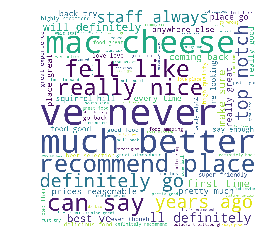

In [88]:
punctuation = set(string.punctuation)
mostcounts =[]
english_cities=['Pittsburgh']
for city in english_cities:
    for s in [5]:
        print ('rating', s)
        temp=[]
        for r in reviews_filtered:
            if busID_city[r['business_id']] == city:
                if r['stars']==s:
                    temp.append(r['text'])
        for word_len in [2]:
            print ('word_len', word_len)
#             T.fit(temp)
#             temp = [' '.join(temp)]
            counts = T.fit_transform(temp)
#             print counts
            freq = np.sum(counts, axis=0)
            vocab = list(T.vocabulary_)
            tup = dict(list(zip(vocab,freq.tolist()[0])))
#             print tup
            alice_mask = np.array(Image.open("y.jpg"))
            stopwords = set(STOPWORDS)
            wc = WordCloud(background_color="white", max_words=100, mask=alice_mask,
                           stopwords=stopwords)
            wc.fit_words(tup)
            # store to file
            wc.to_file(city+'rating'+str(s)+'_'+str(word_len)+"gram.png")
            plt.imshow(wc)
            plt.axis("off")
            plt.figure()
            plt.show()

In [ ]:
l=[]
for r in reviews:
    l.append(len(r['text'].split()))

In [ ]:
import math
data = l
bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   100) # fixed number of bins

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5, color='b')
plt.title('Complete data: Review length vs. # reviews')
plt.xlabel('Reviews length')
plt.ylabel('# of reviews')
plt.savefig('8.1.png', dpi=300)
plt.show()

In [ ]:
filtered_city_list

In [ ]:
xxx=[]
for city in filtered_city_list:
    one, two, three, four, five =0,0,0,0,0
    for r in reviews_filtered:
        if busID_city[r['business_id']]==city:
            if r['stars']==1:
                one+=1
            elif r['stars']==2:
                two+=1
            elif r['stars']==3:
                three+=1
            elif r['stars']==4:
                four+=1
            else:
                five+=1
    xxx.append((city,[one,two,three,four,five]))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

raw_data = {'City': ['Montréal', 'Edinburgh', 'Pittsburgh', 'Stuttgart'],
        '1': [6859,1953,14734,2146],
        '2': [7195,2883,13132,2333],
        '3': [14039,8378,19941,3751],
        '4': [32416,17786,40962,7266],
        '5': [36001,14482,54349,9140]
           }
df = pd.DataFrame(raw_data, columns = ['City', '1','2','3','4','5'])
df

In [50]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['1']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['1'], df['2'], df['3'],df['4'],df['5'])]

rel_1 = [i / j * 100 for  i,j in zip(df['1'], totals)]
rel_2 = [i / j * 100 for  i,j in zip(df['2'], totals)]
rel_3 = [i / j * 100 for  i,j in zip(df['3'], totals)]
rel_4 = [i / j * 100 for  i,j in zip(df['4'], totals)]
rel_5 = [i / j * 100 for  i,j in zip(df['5'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l,
       # using pre_rel data
       rel_1,
       # labeled
       label='Pre Score',
       # with alpha
       alpha=0.9,
       # with color
       color='black',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l,
       # using mid_rel data
       rel_2,
       # with pre_rel
       bottom=rel_1,
       # labeled
       label='Mid Score',
       # with alpha
       alpha=0.9,
       # with color
       color='#3C5F5A',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l,
       # using post_rel data
       rel_3,
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(rel_1, rel_2)],
       # labeled
       label='Post Score',
       # with alpha
       alpha=0.9,
       # with color
       color='blue',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )
ax.bar(bar_l,
       # using post_rel data
       rel_4,
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(rel_1, rel_2,rel_3)],
       # labeled
       label='Post Score 1',
       # with alpha
       alpha=0.9,
       # with color
       color='#219AD8',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l,
       # using post_rel data
       rel_5,
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+l+m for i,j,l,m in zip(rel_1, rel_2,rel_3,rel_4)],
       # labeled
       label='Post Score 2',
       # with alpha
       alpha=0.9,
       # with color
       color='green',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


# Set the ticks to be first names
plt.xticks(tick_pos, df['City'])
ax.set_ylabel("Percentage of reviews")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)])
plt.ylim(0, 100)
# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=0, horizontalalignment='right')
plt.title('Rating distribution: 1 star at bottom (black) to 5 star at top (green))')
plt.savefig('9.1.png',dpi=300)
# shot plot
plt.show()

# Train and compare models

In [89]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words
stop2 = get_stop_words('german')
stop1 = get_stop_words('english')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from textstat.textstat import textstat
from sklearn.linear_model import Ridge
from scipy.special import expit
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVC
from sklearn import svm
import numpy as np

# fall=['fall',10,11,12]
# spring=['spring',4,5,6]
# winter=['winter',1,2,3]
# summer=['summer',7,8,9]
# seasons = [winter, spring, summer, fall]

spring=['2010s',2011,2012,2013,2014,2015,2016,2017]
winter=['2000s',2003,2004,2005,2006,2007,2008,2009,2010]
# seasons = [winter, spring]
seasons = ['Edinburgh', 'Stuttgart','Montréal', 'Pittsburgh']
# english_cities=['Montréal','Edinburgh', 'Pittsburgh']
# nonenglish_cities=['Stuttgart']
# for city in english_cities:
#     print (city)
#     for season in seasons:
english_reviews=[]
english_stars=[]
# nonenglish_reviews=[]
# nonenglish_stars=[]
for r in reviews_filtered:
#     if busID_city[r['business_id']] in english_cities:
    english_reviews.append(r)
    english_stars.append(r['stars'])
#     elif busID_city[r['business_id']] in nonenglish_cities:
#         nonenglish_reviews.append(r)
#         nonenglish_stars.append(r['stars'])

english=[]
english_stars=[]
english_test=[]
english_stars_test=[]

for season in seasons:
    print (season)
    all_1stars_text = []
    all_2stars_text = []
    all_3stars_text = []
    all_4stars_text = []
    all_5stars_text = []
    for r in english_reviews:
#         if int(r['date'].split('-')[0]) in season:
        if busID_city[r['business_id']] == season:
            if r['stars']==1:
                all_1stars_text.append(r['text'])
            elif r['stars']==2:
                all_2stars_text.append(r['text'])
            elif r['stars']==3:
                all_3stars_text.append(r['text'])
            elif r['stars']==4:
                all_4stars_text.append(r['text'])
            else:
                all_5stars_text.append(r['text'])

    all_1stars_labels = [1.0]*len(all_1stars_text)
    all_2stars_labels = [2.0]*len(all_2stars_text)
    all_3stars_labels = [3.0]*len(all_3stars_text)
    all_4stars_labels = [4.0]*len(all_4stars_text)
    all_5stars_labels = [5.0]*len(all_5stars_text)

    all_1stars_text_train, all_1stars_text_test, all_1stars_labels_train, all_1stars_labels_test = train_test_split(all_1stars_text, all_1stars_labels, test_size=0.20)
    all_2stars_text_train, all_2stars_text_test, all_2stars_labels_train, all_2stars_labels_test = train_test_split(all_2stars_text, all_2stars_labels, test_size=0.20)
    all_3stars_text_train, all_3stars_text_test, all_3stars_labels_train, all_3stars_labels_test = train_test_split(all_3stars_text, all_3stars_labels, test_size=0.20)
    all_4stars_text_train, all_4stars_text_test, all_4stars_labels_train, all_4stars_labels_test = train_test_split(all_4stars_text, all_4stars_labels, test_size=0.20)
    all_5stars_text_train, all_5stars_text_test, all_5stars_labels_train, all_5stars_labels_test = train_test_split(all_5stars_text, all_5stars_labels, test_size=0.20)

    english.append(all_1stars_text_train+all_2stars_text_train+all_3stars_text_train+all_4stars_text_train+all_5stars_text_train)

    english_test.append(all_1stars_text_test+all_2stars_text_test+all_3stars_text_test+all_4stars_text_test+all_5stars_text_test)

    english_stars.append(np.array(all_1stars_labels_train+all_2stars_labels_train+all_3stars_labels_train+all_4stars_labels_train+all_5stars_labels_train))

    english_stars_test.append(np.array(all_1stars_labels_test+all_2stars_labels_test+all_3stars_labels_test+all_4stars_labels_test+all_5stars_labels_test))


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Edinburgh
Stuttgart
Montréal


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:62: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pittsburgh


In [90]:
N = [(1,1)]
for i in [0]:
    for n1,n2 in N:
        english_vectorizer=TfidfVectorizer(lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(n1, n2), stop_words=stop1+stop2)
        X_english_train = english_vectorizer.fit_transform(english[i]).toarray()
    #     X_english_test = english_vectorizer.transform(english_test).toarray()
    
    #     reg = RandomForestRegressor(n_estimators=15, criterion='mse', max_depth=20)#GradientBoostingRegressor(n_estimators=100, criterion='mse')
        reg = linear_model.LinearRegression()
    #     reg=GradientBoostingRegressor(n_estimators=200,min_impurity_split=1e-3)
    #     reg=AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
    #     reg=LinearSVC()
    
        reg.fit (X_english_train, list(english_stars[i]))
        X_english_test = english_vectorizer.transform(english_test[i]).toarray()
        english_stars_pred = reg.predict((X_english_test))
        mm=mean_squared_error(english_stars_pred, english_stars_test[i])
        print (round(mm,3))

0.675


In [ ]:
# reg = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=20)#GradientBoostingRegressor(n_estimators=100, criterion='mse')
# #     reg = linear_model.LinearRegression()
# reg.fit(X_german_train, german_stars)
# german_stars_pred = reg.predict(X_german_test)
# #     mse_english.append(mean_squared_error(english_stars_pred, english_stars_test)) 
# mse_german.append(mean_squared_error(german_stars_pred, german_stars_test))
# mse_german

reg = RandomForestRegressor(n_estimators=15, criterion='mse', max_depth=20)#GradientBoostingRegressor(n_estimators=100, criterion='mse')
reg.fit(X_english_train,english_stars)
english_stars_pred = reg.predict(X_english_test)
mse_english.append(mean_squared_error(english_stars_pred, english_stars_test)) 
mse_english

# np.array([N,str(mse_english),str(mse_german)])

In [ ]:
# from vowpalwabbit import pyvw
# vw = pyvw.vw(quiet=True)
# from sklearn import datasets
# from vowpalwabbit.sklearn_vw import VWClassifier

#  # generate some data
# model = VWClassifier()
# model.fit(X_english_train,english_stars)
# # model.score(X_train, y_train)
# english_stars_pred = model.predict(X_english_test)
# mean_squared_error(english_stars_pred, english_stars_test)

# Dimensionality reduction

In [104]:
temp=[]
for r in reviews_filtered:
    if busID_city[r['business_id']] in english_cities:
        if r['useful'] or r['cool'] or r['funny']:
            temp.append([r['useful'],r['cool'],r['funny']])
temp=np.array(temp)

In [105]:
from sklearn.decomposition import PCA
pca=PCA(n_components = 3)
pca.fit(temp)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [111]:
pca.explained_variance_

array([ 23.9737778 ,   1.10051455,   0.72412819])

In [119]:
x=[]
for b in business_records:
    if b['categories']:
        if 'Restaurants' in b['categories']:
            x.append(b['business_id'])

In [121]:
t=0
x=set(x)
for r in reviews_filtered:
    if r['business_id'] in x:
            t+=1
t

214261

In [125]:
rest=[]
for b in business_records:
    if b['business_id'] in x:
        rest.append(b)

In [138]:
r_Seafood=[]
for r in rest:
    if 'Seafood' in r['categories']:
        r_Seafood.append(r)
# len(list(set(ff)))

In [131]:
counts = Counter(ff)